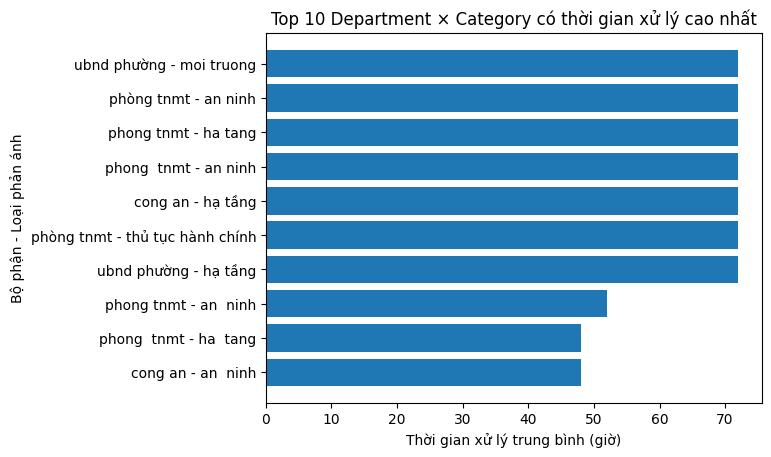

In [4]:
#Thời gian xử lý trung bình theo Department × Category
import pandas as pd
import matplotlib.pyplot as plt
#đọc file
df = pd.read_csv("../task04_merg e/full_feedback_merged.csv")

# Pivot
pivot_time = pd.pivot_table(
    df,
    index='department',
    columns='category',
    values='resolution_hours',
    aggfunc='mean'
)

# Chuyển sang dạng dài
stacked_time = pivot_time.stack().reset_index(name='avg_resolution_hours')

# Lấy top 10 cao nhất
top10 = stacked_time.sort_values(
    'avg_resolution_hours', ascending=False
).head(10)

# Vẽ biểu đồ cột
plt.figure()
plt.barh(
    top10['department'] + " - " + top10['category'],
    top10['avg_resolution_hours']
)
plt.xlabel("Thời gian xử lý trung bình (giờ)")
plt.ylabel("Bộ phận - Loại phản ánh")
plt.title("Top 10 Department × Category có thời gian xử lý cao nhất")
plt.gca().invert_yaxis()
plt.show()


<Figure size 640x480 with 0 Axes>

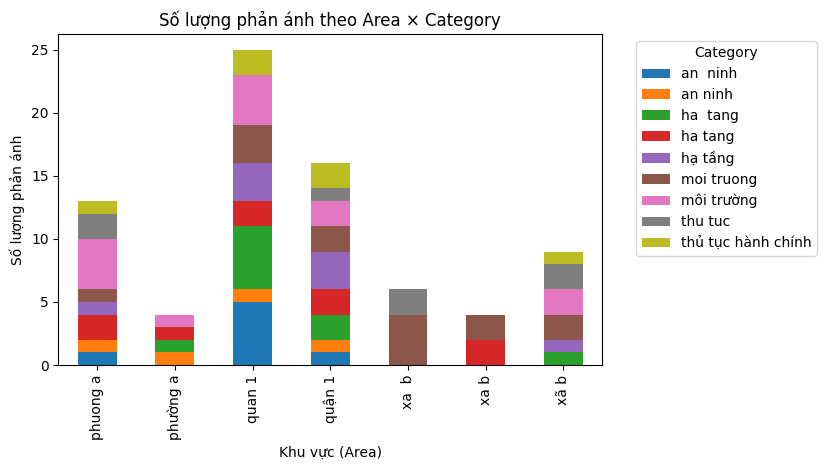

In [5]:
#BIỂU ĐỒ 2
#Số lượng phản ánh theo Area × Category
pivot_count = pd.pivot_table(
    df,
    index='area',
    columns='category',
    values='feedback_id',
    aggfunc='count',
    fill_value=0
)

plt.figure()
pivot_count.plot(kind='bar', stacked=True)
plt.xlabel("Khu vực (Area)")
plt.ylabel("Số lượng phản ánh")
plt.title("Số lượng phản ánh theo Area × Category")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


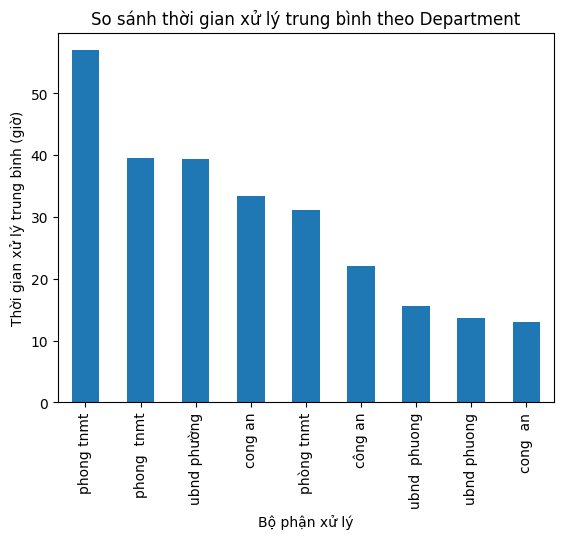

In [6]:
#BIỂU ĐỒ 3 
#Thời gian xử lý trung bình theo Department
avg_by_dept = (
    df.groupby('department')['resolution_hours']
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
avg_by_dept.plot(kind='bar')
plt.xlabel("Bộ phận xử lý")
plt.ylabel("Thời gian xử lý trung bình (giờ)")
plt.title("So sánh thời gian xử lý trung bình theo Department")
plt.show()
